In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 

### Epi data

https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/new-york/


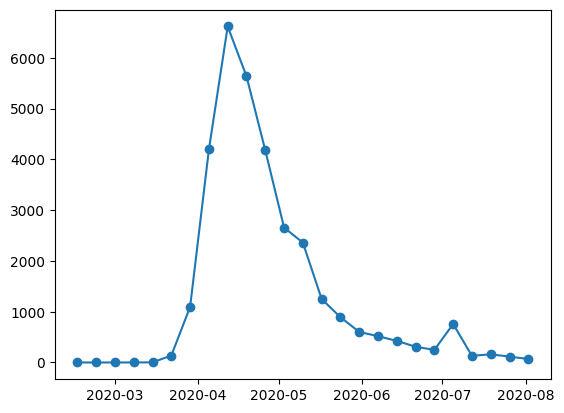

In [12]:
dataus = pd.read_csv("./raw_data/covid_deaths_usafacts.csv")
dataus = dataus.groupby("State", as_index=False).sum()
data_NY = dataus.loc[dataus.State == "NY"]
data_NY = data_NY.T.iloc[4:]
data_NY.reset_index(inplace=True)
data_NY.columns = ["Day", "Deaths"]
data_NY["Day"] = pd.to_datetime(data_NY["Day"])
data_NY = data_NY.loc[(data_NY["Day"] >= "2020-02-10") & (data_NY["Day"] <= "2020-07-31")]
data_NY["daily_deaths"] = data_NY["Deaths"].diff()  

# compute weekly deaths
data_NY.set_index("Day", inplace=True)
data_NY = data_NY.resample("W").sum()
data_NY = data_NY.reset_index()

plt.plot(data_NY["Day"], data_NY["daily_deaths"], marker="o")

In [13]:
data_NY[["Day", "daily_deaths"]].rename(columns={"Day": "date", 
                                                 "daily_deaths": "data"}).to_csv("./NY_deaths.csv", index=False)

### Google Mobility

In [14]:
google = pd.read_csv("./raw_data/2020_US_Region_Mobility_Report.csv")
google = google.loc[(google.sub_region_1 == "New York") & (google.sub_region_2.isnull())]
google["date"] = pd.to_datetime(google["date"])

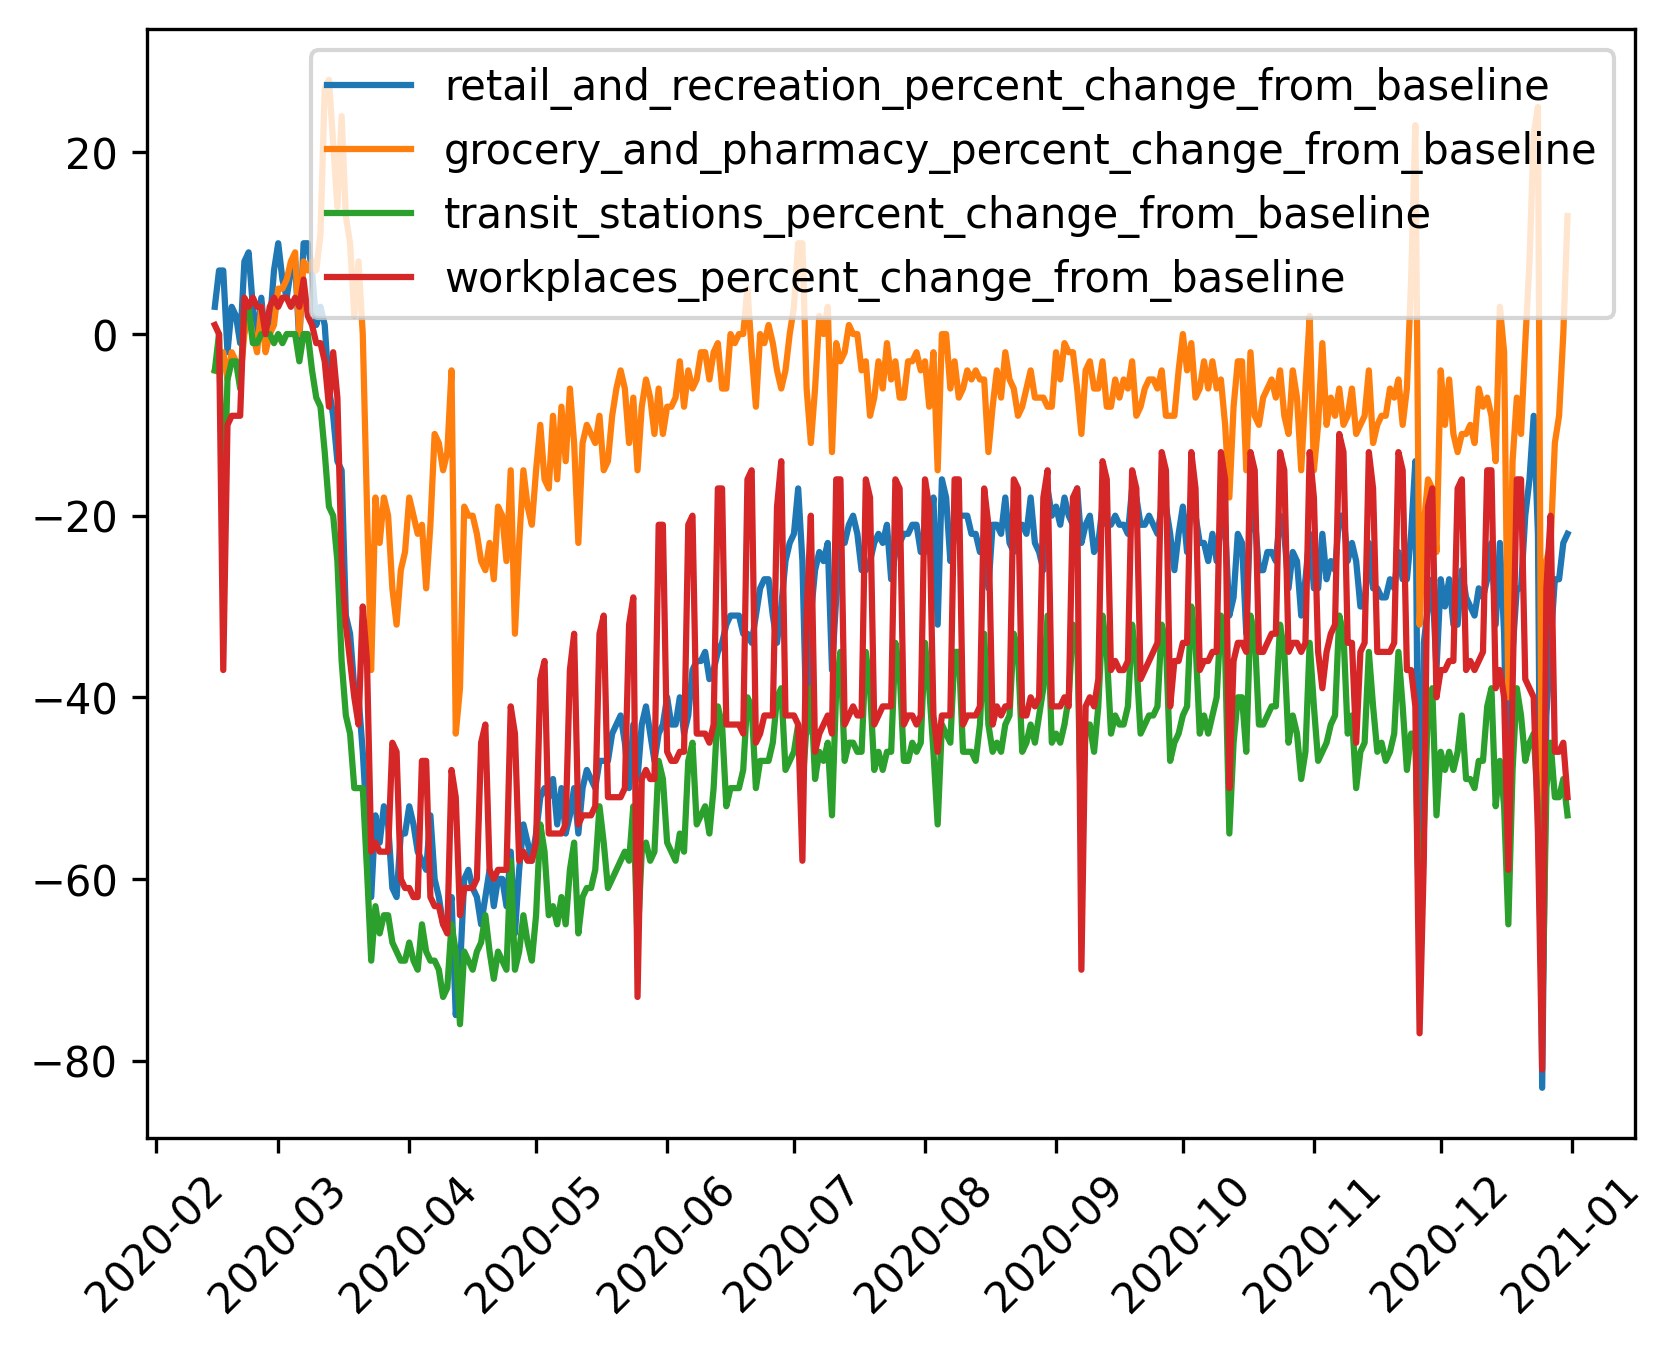

In [15]:
fig, ax = plt.subplots(dpi=300)
for c in ['retail_and_recreation_percent_change_from_baseline',
          'grocery_and_pharmacy_percent_change_from_baseline',
          'transit_stations_percent_change_from_baseline',
          'workplaces_percent_change_from_baseline']: 
    plt.plot(google["date"], google[c], label=c)

plt.legend()
ax.tick_params(axis='x', rotation=45)   

In [16]:
google.to_csv("./NY_google.csv", index=False)